tahap 1 baseline 1.2 model decision tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# baca dataset
df = pd.read_csv("obesity_level.csv")

In [3]:
# Interpretasi BMI
# formula BMI = berat(kg) / tinggi(m)^2
df['BMI'] = df['Weight'] / (df['Height']**2)

In [4]:
# List kolom kategori (format string)
categorical_cols = ["Gender", "CAEC", "CALC", "MTRANS", "0be1dad"]

In [5]:
# copy dataframe
df_encoded = df.copy()

In [6]:
# Encode tiap kolom kategori
# rubah kolom kategori string menjadi numerik
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [7]:
# Cek hasil encode
print(df_encoded.head())

   id  Gender        Age    Height      Weight  \
0   0       1  24.443011  1.699998   81.669950   
1   1       0  18.000000  1.560000   57.000000   
2   2       0  18.000000  1.711460   50.165754   
3   3       0  20.952737  1.710730  131.274851   
4   4       1  31.641081  1.914186   93.798055   

   family_history_with_overweight  FAVC      FCVC       NCP  CAEC  SMOKE  \
0                               1     1  2.000000  2.983297     3      0   
1                               1     1  2.000000  3.000000     2      0   
2                               1     1  1.880534  1.411685     3      0   
3                               1     1  3.000000  3.000000     3      0   
4                               1     1  2.679664  1.971472     3      0   

       CH2O  SCC       FAF       TUE  CALC  MTRANS  0be1dad        BMI  
0  2.763573    0  0.000000  0.976473     2       3        6  28.259565  
1  2.000000    0  1.000000  1.000000     0       0        0  23.422091  
2  1.910378    0  0.866

In [8]:
#  Pisahkan fitur & target
#  X hapus kolom 0be1dad (features / input)
#  Y kolom 0be1dad (target / input)
X = df_encoded.drop("0be1dad", axis=1)
y = df_encoded["0be1dad"]

In [9]:
# Split data train/test
# dengan rincian 20% data test & 80% data train. dengan seed random 42 agar data konsisten setiap dijalankan.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
# Train Decision Tree
# buat model decision tree dengan random state 42 agar hasil konsisten serta latih dengan data train.
dt = DecisionTreeClassifier(
    max_depth=10,
    min_samples_leaf=5,
    min_samples_split=10,
    random_state=42
    )
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [11]:
# Evaluasi model
# prediksi data test dengan model yang telah dilatih. x_test belum pernah diltih untuk melihat seberapa baik model.
y_pred = dt.predict(X_test)

In [12]:
# tampilkan akurasi
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       626
           1       0.92      0.93      0.92       524
           2       0.84      0.87      0.85       543
           3       0.98      0.94      0.96       657
           4       1.00      0.99      1.00       804
           5       0.71      0.74      0.73       484
           6       0.76      0.75      0.75       514

    accuracy                           0.88      4152
   macro avg       0.87      0.87      0.87      4152
weighted avg       0.88      0.88      0.88      4152



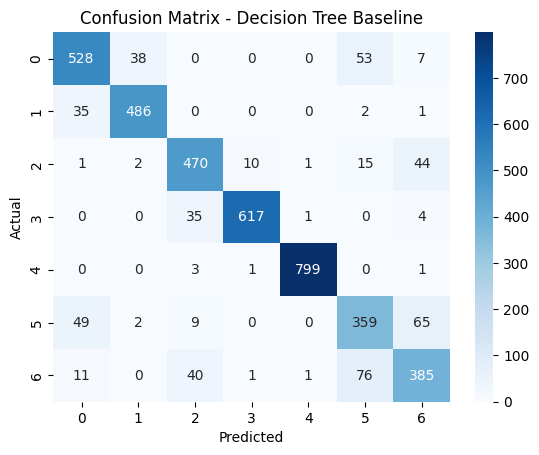

In [13]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree Baseline")
plt.show()

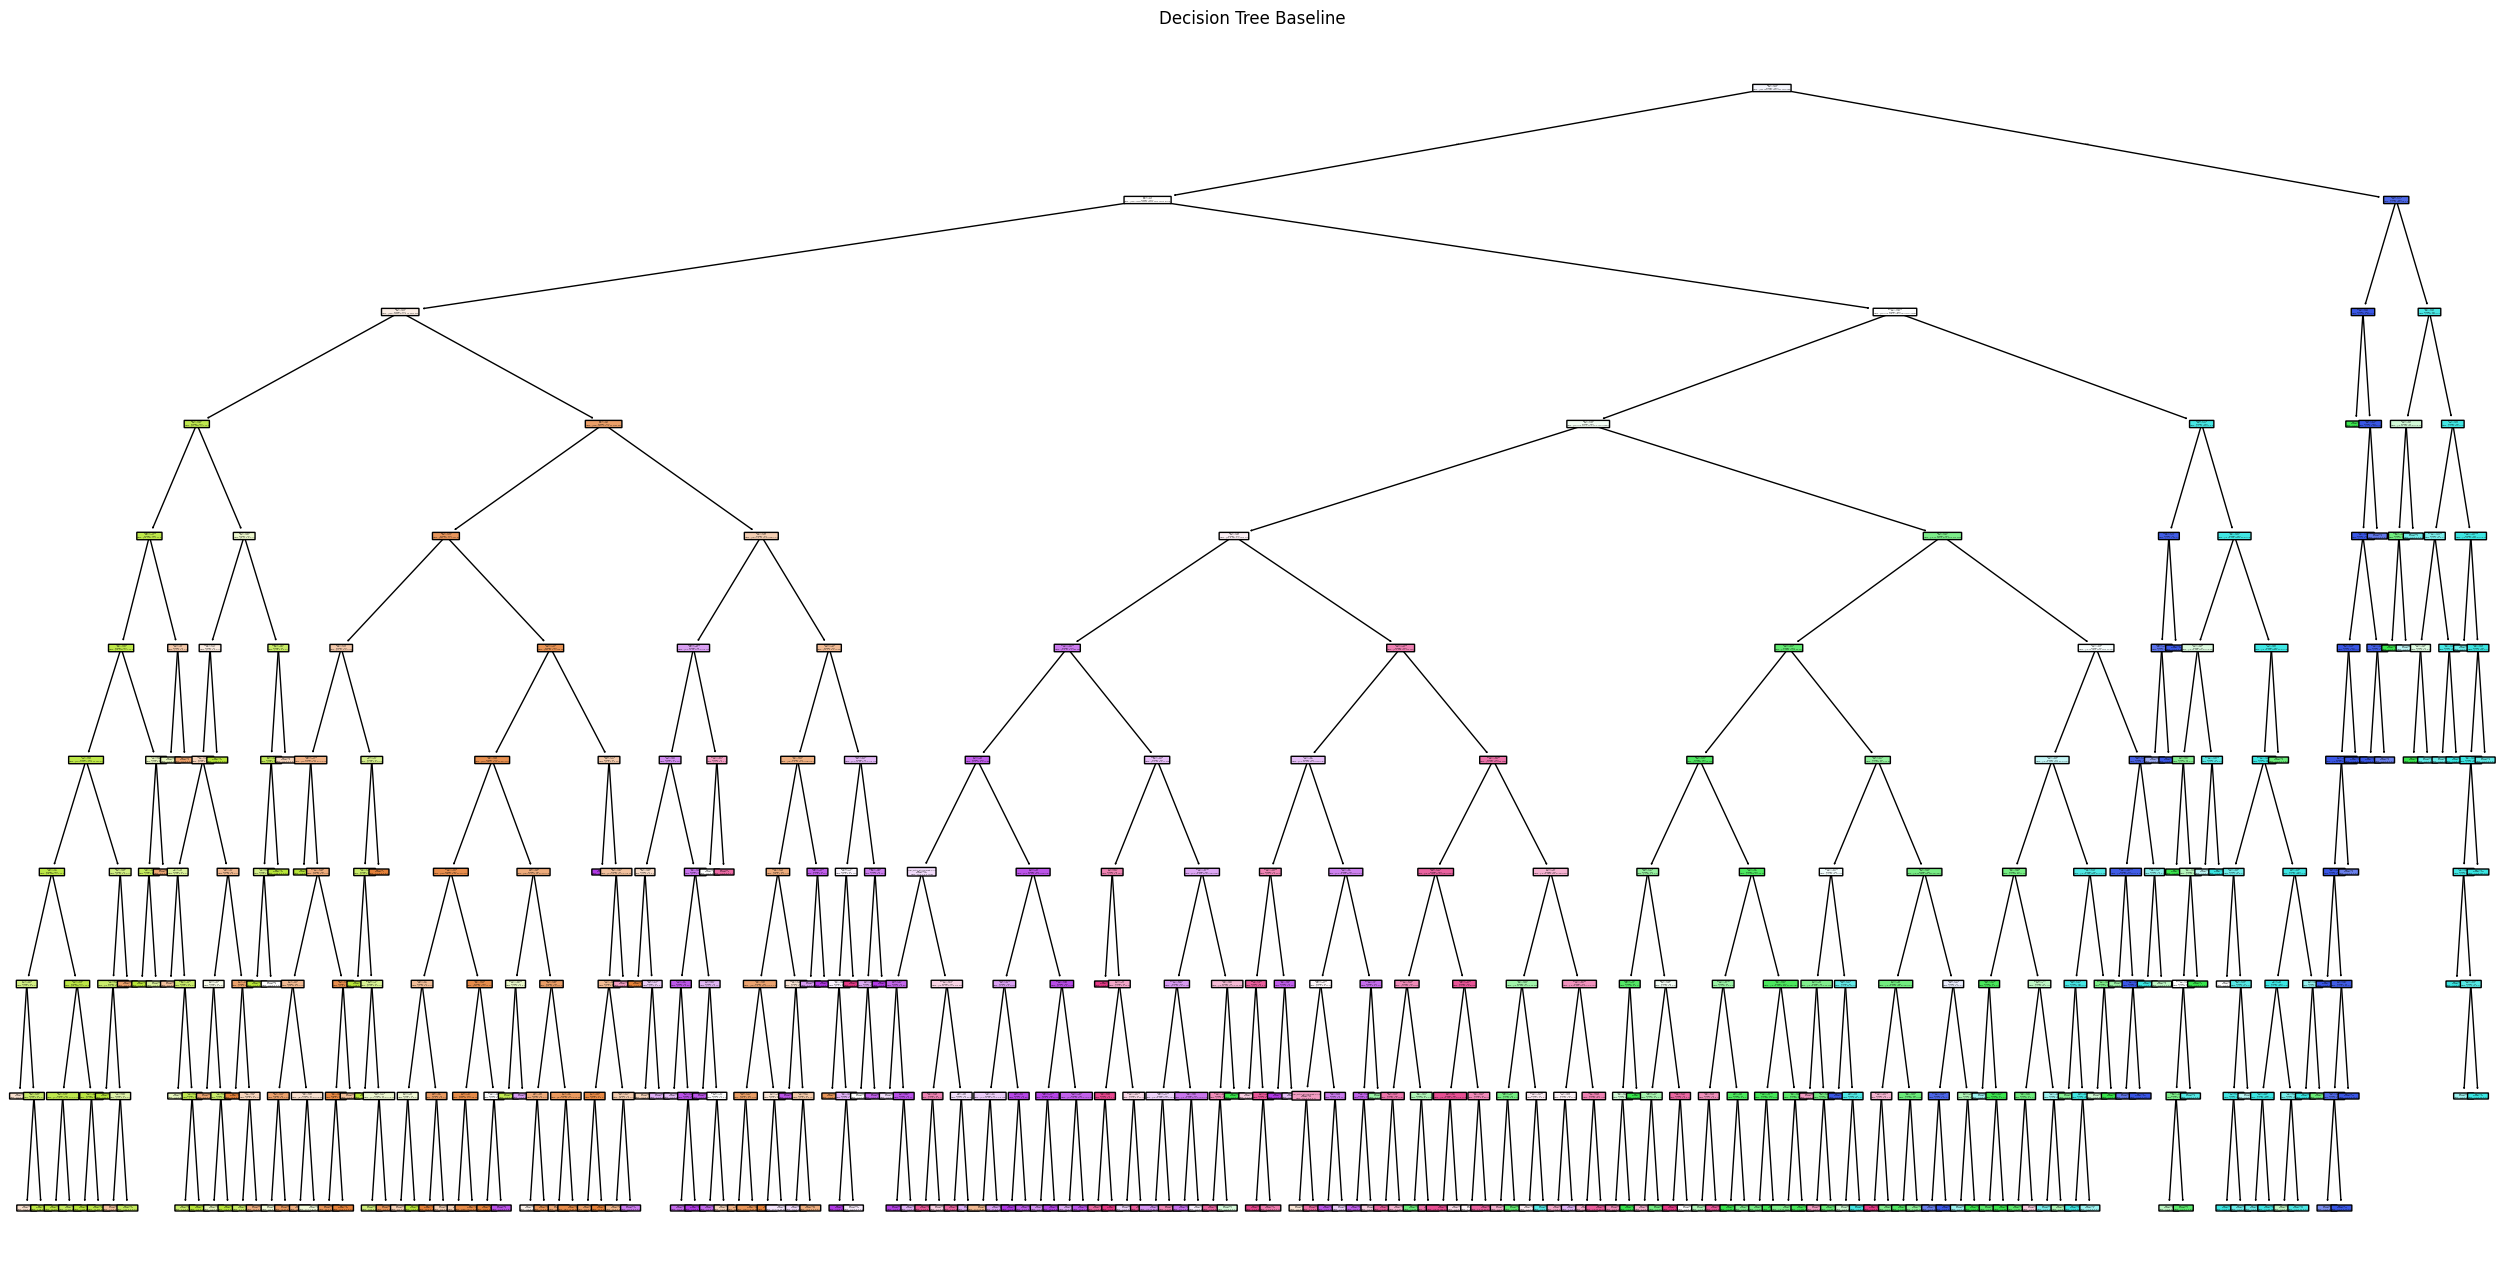

In [14]:
# Visualisasi pohon keputusan
plt.figure(figsize=(32,16))
plot_tree(dt, feature_names=X.columns, class_names=[str(c) for c in np.unique(y)], filled=True, rounded=True)
plt.title("Decision Tree Baseline")
plt.show()